# Data and sentences analysis for selected papers
***

The purpose of this notebook is to analyse extracted sentences and annotations. The extracted data and sentences are created by this notebook: 
[data_sentence_extraction](data_sentence_extraction.ipynb)

**Keyword counts by list of keywords**
* ['code/extracted_data'](https://github.com/yasminsarkhosh/machine-learning-bsc-thesis-2024/blob/main/code/extracted_data)

**Extracted sentences by list of keywords**
* ['code/extracted_sentences'](https://github.com/yasminsarkhosh/machine-learning-bsc-thesis-2024/blob/main/code/extracted_sentences)

***

**The analysis process for this notebook includes:**
1. Keyword Counting and Aggregation and Category Aggregation: 
    - Functions to count occurrences of keywords in extracted sentences and aggregate these counts by document and
    - Aggregate them into broader categories.
2. Binary Conversion:  
    - Convert keyword counts to binary values 
3. Data Visualization: 
    - Functions to plot the distribution of keywords and categories across documents.
4. Loading and Updating DataFrames: 
    - Functions for loading data, printing unique title counts, and updating DataFrames with keyword matches.
5. Annotation Analysis: 
    - Functions to process manually-annotated annotation data, 
    - Convert data types, and 
    - Plot comparisons of total papers vs. non-zero counts (0 for no, 1 for yes)
***

Setup and Imports: Import necessary libraries (e.g., os, pandas).
***

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

#### **Unified Keyword-Categories Mapping**
***
Purpose: To make it easier to add, remove, or modify categories and associated keywords.

**Streamlined Processing Functions** 

Offers a cohesive set of functions for: 
- Counting keywords, 
- Aggregating counts, 
- Converting to binary, and 
- Visualization

**Simplified Analysis Pipeline** 
- Provides a single function, analyze_keywords_in_documents, that orchestrates the entire process from keyword counting to visualization

***

In [2]:
# List of keywords used for sentence extractions and annotations
keywords_age        = ['age']

keywords_gender     = ['gender', 'sex', 'women', 'woman', 'female', 'male']

keywords_etnicity   = ['etnicity', 'etnicities', 'race', 'white patients', 'black patients']

keywords_geoloc     = ['geolocation', 'geographical', 'geographic', 'country', 'countries', 'city', 'cities', 
                        'hospital', 'hospitals', 'clinic', 'clinics', 'society', 'societies',]

keywords_bias       = ['bias', 'biases','fairness']

In [3]:
# Unified keyword to category mapping including all themes
keywords_by_category = {
    'demographics_': [
        'age', 'gender', 'sex', 'women', 'woman', 'female', 'male',
        'etnicity', 'etnicities', 'race', 'white patients', 'black patients'],
    'geolocation_': [
        'geolocation', 'geographical', 'geographic', 'country', 'countries', 
        'city', 'cities', 'hospital', 'hospitals', 'clinic', 'clinics'],
    'bias_': ['bias', 'biases', 'fairness'],
    'patient_': ['patient', 'patients']
}

1. Keyword Counting and Aggregation and Category Aggregation: 
***

In [4]:
# Helper functions to count, aggregate, convert, and visualize keyword data
from itertools import count


# def count_keywords(text, keywords):
#     text = text.lower()
#     return {keyword: text.count(keyword) for keyword in keywords}
def count_keywords(text, keywords):
    # Counter object to count occurrences of each keyword
    counts = Counter()
    for keyword in keywords:
        # Count occurrences of the keyword in the text
        counts[keyword] = text.lower().count(keyword)
    return counts


#Now, the 'aggregate_keyword_counts' function expects the 'keywords_by_category' to check for presence of each keyword
#Ensure you call this function with 'keywords_by_category' as an argument where you have defined it

# def aggregate_keyword_counts(df, text_column='extracted_keyword_sent'):
#     all_counts = []
#     for _, row in df.iterrows():
#         counts = count_keywords(row[text_column], sum(keywords_by_category.values(), []))
#         print(counts)
#         counts['title'] = row['title']  # Add title for grouping
#         all_counts.append(counts)
#     return pd.DataFrame(all_counts).groupby('title').sum()

def aggregate_keyword_counts(df, text_column = 'extracted_keyword_sent'):
    # Aggregate 'extracted_sentences' for each 'title' and count keywords
    results = {}
    for title, group in df.groupby('title'):
        # Combine all extracted sentences into one large text block
        aggregated_text = " ".join(group[text_column].tolist())
        # Count the keywords in this aggregated text
        keyword_counts = count_keywords(aggregated_text, sum(keywords_by_category.values(), []))
        # Store the result
        results[title] = keyword_counts
    # Convert the results dictionary to a DataFrame 
    results_df = pd.DataFrame.from_dict(results, orient='index')
    return results_df

Category Aggregation:
***

In [5]:
# insert code to group keywords by categories for data visualisations

2. Binary Conversion: 
***

In [6]:
def convert_counts_to_binary(df):
    return df.map(lambda x: 1 if x > 0 else 0)

In [7]:
# def agg_columns_to_categories(df, keyword_to_category):
#     category_to_keywords = {}
#     for keyword, category in keyword_to_category.items():
#         category_to_keywords.setdefault(category, []).append(keyword)
#     for category, keywords in category_to_keywords.items():
#         df[category] = df[keywords].sum(axis=1)
#         df.drop(columns=keywords, inplace=True)
#     return df

3. Data Visualization: 
***

In [8]:
# With customized header title (each graph named after doc-title)
def visualize_category_counts(df, document_title):
    # Title-case the document title
    document_title = document_title.title()

    # Filter categories with counts greater than 0
    category_counts = df.sum().sort_values()
    filtered_counts = category_counts[category_counts > 0]

    # Plot only the filtered categories
    filtered_counts.plot(kind='barh', figsize=(10, 6))
    plt.title(f'Frequency of Keywords Across Selected MICCAI 2023 Papers - | {document_title} |')
    plt.xlabel('Total Counts')
    plt.ylabel('Keywords')
    plt.show()

In [9]:
# Visualization Functions
def plot_category_percentage_counts(df):
    category_sums = df.sum()[1:]
    category_percentages = (category_sums / category_sums.sum()) * 100
    plt.bar(category_sums.index, category_percentages)
    plt.xticks(rotation=90)
    plt.ylim(0, 100)
    plt.ylabel('Percentage of Total Keywords')
    plt.show()

In [10]:
def analyze_keywords_in_documents(df, document_title, text_column='extracted_keyword_sent'):
    # Aggregate keyword counts
    keyword_counts = aggregate_keyword_counts(df, text_column='extracted_keyword_sent')
    
    # Convert counts to binary
    binary_keyword_counts = convert_counts_to_binary(keyword_counts)
    
    # Visualize category counts
    visualize_category_counts(binary_keyword_counts, document_title)

Analyzing category: demographics
Number of unique titles: 263


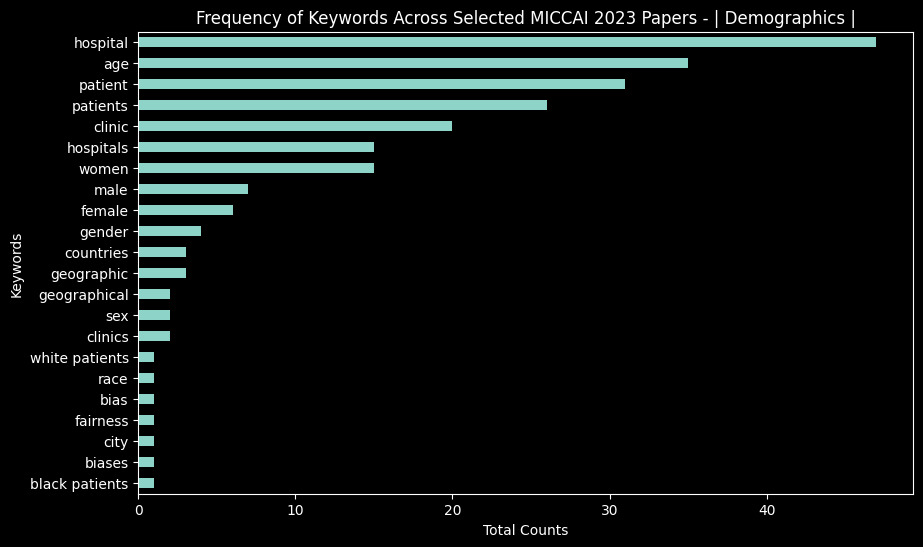

Analyzing category: patients
Number of unique titles: 263


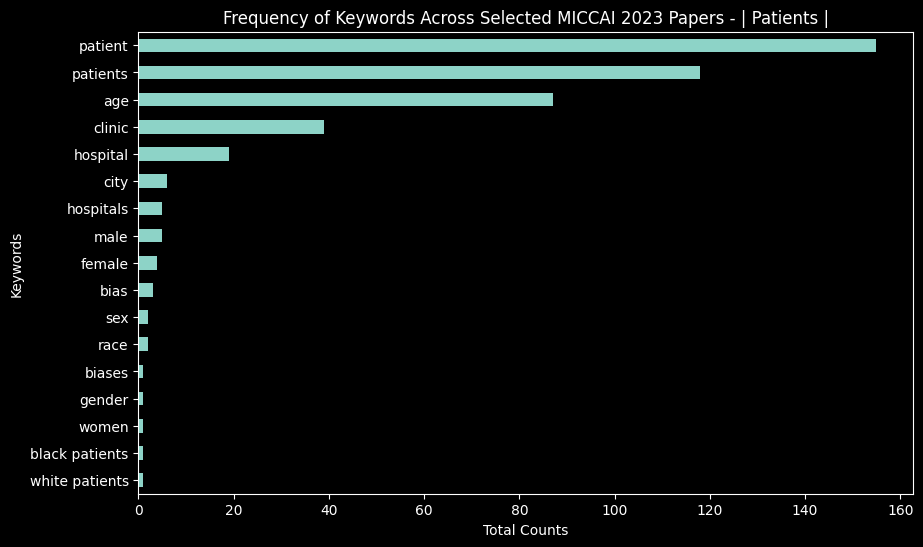

Analyzing category: bias
Number of unique titles: 263


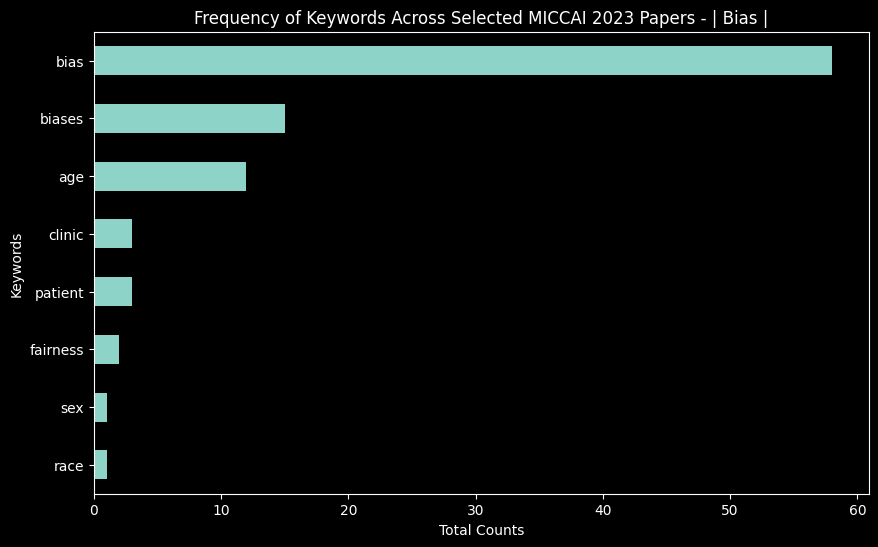

In [11]:
def analyze_keywords_from_file(filenames, category):
    
    dfs = []  # List to store dataframes for merging
    for filename in filenames:
        document_title = os.path.basename(filename).replace('_', ' ').split('.')[0].title()
        # Load each file into a DataFrame and add it to the list
        df = pd.read_csv(filename)
        dfs.append(df)
    # Concatenate all dataframes in the list into a single dataframe
    merged_df = pd.concat(dfs, ignore_index=True)
    print(f"Analyzing category: {category}")
    print(f"Number of unique titles: {len(merged_df['title'].unique())}")
    # Here, you can replace this with any function that analyzes the merged_df  

    analyze_keywords_in_documents(merged_df, category, document_title) 

# Path to the folder where the files are stored 
base_path = '/Users/yasminsarkhosh/Documents/GitHub/machine-learning-bsc-thesis-2024/outputs/extracted_sentences'

# Categorizing files into categories for analysis
files_by_category = {
    'demographics': [
        base_path + '/age_related_sentences.csv',
        base_path + '/gender_related_sentences.csv',
        base_path + '/ethnicity_related_sentences.csv',
        base_path + '/geolocation_related_sentences.csv',
    ],
    'patients': [
        base_path + '/patients_related_sentences.csv',
    ],
    'bias': [
        base_path + '/bias_related_sentences.csv',
    ]
}

# Loop over each category and perform analysis
for category, filenames in files_by_category.items():
    analyze_keywords_from_file(filenames, category)


# Old notebook

In [482]:
import os
import re
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import sys

In [483]:
# Function to count keywords in a text
def count_keywords(text, keywords):
    # Counter object to count occurrences of each keyword
    counts = Counter()
    for keyword in keywords:
        # Count occurrences of the keyword in the text
        counts[keyword] = text.lower().count(keyword)
    return counts

def agg_keywords(df, col_title, keywords):
    # Aggregate 'extracted_sentences' for each 'title' and count keywords
    results = {}
    for title, group in df.groupby('title'):
        # Combine all extracted sentences into one large text block
        aggregated_text = " ".join(group[col_title].tolist())
        # Count the keywords in this aggregated text
        keyword_counts = count_keywords(aggregated_text, keywords)
        # Store the result
        results[title] = keyword_counts

    # Convert the results dictionary to a DataFrame 
    results_df = pd.DataFrame.from_dict(results, orient='index')
    return results_df

In [484]:
# Convert counts to binary values
def convert_to_binary_values(df):
    columns_to_convert = df.columns.tolist()

    # Convert to binary: 1 if the count is greater than 0, else 0
    for column in columns_to_convert:
        df[column] = df[column].apply(lambda x: 1 if x > 0 else 0)
    
    return df

In [485]:
# Reverse the mapping for aggregation
def agg_columns_to_categories(df, keyword_to_category):
    category_to_keywords = {}
    for keyword, category in keyword_to_category.items():
        category_to_keywords.setdefault(category, []).append(keyword)

    # Aggregate columns into categories
    for category, keywords in category_to_keywords.items():
        if category in df.columns:
            # If the category already exists, add to it
            df[category] += df[keywords].sum(axis=1)
        else:
            # Otherwise, create a new column for the category
            df[category] = df[keywords].sum(axis=1)
        # Drop the original keyword columns
        df.drop(columns=keywords, inplace=True)

    return df

***
### Functions for data visualisations
***

In [486]:
# Plotting the number of category-related keywords in papers 
def plot_category(category, df):
    df[category].value_counts().plot(kind='bar')
    plt.title('Number of Papers Discussing ' + category)
    plt.xlabel('Mentions of ' + category + '-Related Keywords')
    plt.ylabel('Number of Papers')
    plt.show()

In [487]:
# Subplotting the number of category-related keywords in papers
def subplot_categories_binary(categories_to_plot, agg_results_df):
    # Define the number of rows and columns for the subplots based on the number of categories
    num_categories = len(categories_to_plot)
    num_cols = 3  # Choose the number of columns for your subplot grid
    num_rows = num_categories // num_cols + (num_categories % num_cols > 0)

    # Create subplots
    fig, axs = plt.subplots(num_rows, num_cols, figsize=(4 * num_cols, 3 * num_rows))  # Adjust figsize as necessary
    axs = axs.flatten()  # Flatten the array of axes for easier iteration

    total_papers = len(agg_results_df)  # The total number of papers
    
    # Plot a bar plot for each specified category
    for i, category in enumerate(categories_to_plot):
        # Create the bar plot on the appropriate subplot
        # Note: This assumes each entry in these columns is a count. If not, adjust the plotting code accordingly.
        agg_results_df[category].value_counts().sort_index().plot(kind='bar', ax=axs[i], title=category.capitalize(), color='skyblue')
        axs[i].set_xlabel('Mentions of ' + category + '-related keywords')
        axs[i].set_xticks(ticks=[0, 1], labels=['No', 'Yes']) # Customize the x-axis tick labels

        axs[i].set_ylabel('Number of Papers')
        axs[i].set_ylim(0, 300)  # Adjust y-axis limits as necessary
        axs[i].set_title('Number of papers discussing ' + '|' + category + '|', fontsize=10, fontweight='bold', color='white', loc='center', pad=10, weight='bold')
    
        # Add a horizontal line at the total number of papers
        axs[i].axhline(y=total_papers, color='r', linestyle='--', label='papers in total')

        # Add legend to the subplot
        axs[i].legend(loc='lower left', fontsize=8)

    # Hide any unused subplot axes
    for j in range(i + 1, num_rows * num_cols):
        axs[j].set_visible(False)

    # Adjust the layout
    plt.tight_layout()
    plt.show()

In [488]:
def plot_category_percentage_binary(df):    
    # Drop non-category columns
    df_categories = df.drop(df.columns[0], axis=1)

    # Calculate the sum for each category
    category_sums = df_categories.sum()

    # Calculate the percentage for each category
    total_papers = len(df)  # The total number of papers
    category_percentages = (category_sums / total_papers) * 100

    # Create a bar plot with percentage values
    category_percentages.plot(kind='bar', stacked=False, color='skyblue').set_ylim(0, 100) # Set the y-axis limits to 0-100
    plt.title('Category Distribution in Selected Papers', fontsize=12, fontweight='bold', color='white', loc='center', pad=10, weight='bold',
              backgroundcolor='black', ha='center')
    plt.ylabel('Percentage in Total')
    plt.show()

In [489]:
def plot_category_percentage_counts(df):    
    # Drop non-category columns
    xlabels = list(df.columns[1:])
    category_sums = df.sum()[1:]
    total_counts = category_sums.sum()

    category_percentages = []    
    total_word_count = total_counts
    for cat in category_sums:
        percentages = (cat / total_word_count) * 100
        category_percentages.append(percentages)
    
    print(category_percentages)

    # Create a bar plot with percentage values
    plt.bar(xlabels,category_percentages)
    plt.xticks(rotation=90)
    plt.ylim(0, 100) # Set the y-axis limits to 0-100
    plt.title('Keyword counts', fontsize=12, fontweight='bold', color='white', loc='center', pad=10, weight='bold',
              backgroundcolor='black', ha='center')
    plt.ylabel('Percentage in Total')
    plt.show()

***

***

In [490]:

# List of keywords used for sentence extractions and annotations
keywords_age        = ['age']

keywords_gender     = ['gender', 'sex', 'women', 'woman', 'female', 'male']

keywords_etnicity   = ['etnicity', 'etnicities', 'race', 'white patients', 'black patients']

keywords_geoloc     = ['geolocation', 'geographical', 'geographic', 'country', 'countries', 'city', 'cities', 
                        'hospital', 'hospitals', 'clinic', 'clinics', 'society', 'societies',]

keywords_bias       = ['bias', 'biases','fairness']

***

In [491]:
# Mapping of keywords to main categories
keyword_to_category_demo = {
    'age'   : 'demographics_',
    'gender': 'demographics_',
    'sex'   : 'demographics_',
    'female': 'demographics_',
    'women' : 'demographics_',
    'woman' : 'demographics_',
    'male'  : 'demographics_',
    'etnicity'      : 'demographics_',
    'etnicities'    : 'demographics_',
    'race'          : 'demographics_',
    'white patients': 'demographics_',
    'black patients': 'demographics_',
    'bias'          : 'bias_',
    'biases'        : 'bias_',
}

# List of keywords used for sentence extractions and annotations
keywords_demo        = ['age', 'gender', 'sex', 'women', 'woman', 'female', 'male',
                       'etnicity', 'etnicities', 'race', 'white patients', 'black patients']

In [492]:
# Mapping of keywords to main categories
keyword_to_category_geoloc = {
    'geolocation'       : 'geolocation_',
    'geographical'      : 'geolocation_',
    'geographic'        : 'geolocation_',
    'country'           : 'geolocation_',
    'countries'         : 'geolocation_',
    'city'              : 'geolocation_',
    'cities'            : 'geolocation_',
    'hospital'          : 'hospital_',
    'hospitals'         : 'hospital_',
    'clinic'            : 'hospital_',
    'clinics'           : 'hospital_',
}
keywords_geoloc     = ['geolocation', 'geographical', 'geographic', 'country', 'countries', 'city', 'cities', 
                        'hospital', 'hospitals', 'clinic', 'clinics']

In [493]:
keywords_bias = ['bias', 'biases']

# Mapping of keywords to main categories
keyword_to_category_bias = {
    'bias'   : 'bias_',
    'biases': 'bias_',
}

***

In [494]:
keywords_patients = ['patient', 'patients']

# Mapping of keywords to main categories
keyword_to_category_patients = {
    'patient'   : 'patient_',
    'patients': 'patient_',
}

***

***

In [500]:
def load_csv_and_print_unique_titles(filename):
    """
    Loads a CSV file into a pandas DataFrame and prints the number of unique titles.

    Parameters:
    - filename: The path to the CSV file.

    Returns:
    - The loaded DataFrame.
    """
    # Load the CSV file
    df = pd.read_csv(filename, index_col=0)
    
    # Print the number of unique titles
    unique_titles_count = len(df['title'].unique())
    print(f"Number of unique titles: {unique_titles_count}")
    
    return df

#filename = '/Users/yasminsarkhosh/Documents/GitHub/machine-learning-bsc-thesis-2024/code/outputs/extracted_sentences/age_related_sentences.csv'
filename = '/Users/yasminsarkhosh/Documents/GitHub/machine-learning-bsc-thesis-2024/code/outputs/extracted_sentences/gender_related_sentences.csv'
extracted_df = load_csv_and_print_unique_titles(filename)


Number of unique titles: 263


In [502]:
def update_df_with_keyword_matches(df, keywords, text_column, save_path=None):
    """
    Updates the DataFrame by adding binary columns for each keyword based on their presence in the text column.
    
    Parameters:
    - df: The DataFrame containing the text data.
    - keywords: A list of keywords to search for within the text column.
    - text_column: The name of the column in df that contains the text to search through.
    - save_path: Optional; if provided, the updated DataFrame will be saved to this path.
    
    Returns:
    - The updated DataFrame with binary columns for keyword matches.
    """
    # Initialize columns for each keyword with default value 0
    for keyword in keywords:
        df[keyword] = 0

    # Define a function to update the keyword columns based on matches
    def update_keyword_columns(row):
        text = row[text_column].lower()  # Convert text to lower case for case-insensitive matching
        for keyword in keywords:
            # Update the column for the keyword if it's found in the text
            row[keyword] = 1 if keyword in text else 0
        return row

    # Apply the function to each row in the DataFrame
    updated_df = df.apply(update_keyword_columns, axis=1)

    # if save_path:
    #     updated_df.to_csv(save_path, index=False)
    
    return updated_df

#updated_df = update_df_with_keyword_matches(extracted_df, keywords_age, 'extracted_keyword_sent')
updated_df = update_df_with_keyword_matches(extracted_df, keywords_gender, 'extracted_keyword_sent')
# updated_df = update_df_with_keyword_matches(extracted_df, keywords_etnicity, 'extracted_keyword_sent')
# updated_df = update_df_with_keyword_matches(extracted_df, keywords_geoloc, 'extracted_keyword_sent')
# updated_df = update_df_with_keyword_matches(extracted_df, keywords_patients, 'extracted_keyword_sent')
# updated_df = update_df_with_keyword_matches(extracted_df, keywords_bias, 'extracted_keyword_sent')

updated_df


,title,extracted_keyword_sent,gender,sex,women,woman,female,male
0,Anatomy-Driven Pathology Detection on Chest X-...,none,0,0,0,0,0,0
1,Self-supervised Learning for Physiologically-B...,none,0,0,0,0,0,0
2,AME-CAM: Attentive Multiple-Exit CAM for Weakl...,none,0,0,0,0,0,0
3,Weakly-Supervised Positional Contrastive Learn...,none,0,0,0,0,0,0
4,Unsupervised Discovery of 3D Hierarchical Stru...,none,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
267,CoLa-Diff: Conditional Latent Diffusion Model ...,none,0,0,0,0,0,0
268,InverseSR: 3D Brain MRI Super-Resolution Using...,this network ε θ is conditioned on four condit...,1,0,0,0,0,0
269,InverseSR: 3D Brain MRI Super-Resolution Using...,"gender is a binary variable, while the rest of...",1,0,0,0,0,0
270,Topology-Preserving Computed Tomography Super-...,none,0,0,0,0,0,0


In [503]:
# Count the number of occurrences of each keyword in the extracted sentences
keyword_counts = agg_keywords(updated_df, 'extracted_keyword_sent', keywords_gender)
keyword_counts

,gender,sex,women,woman,female,male
3D Arterial Segmentation via Single 2D Projections and Depth Supervision in Contrast-Enhanced CT Images,0,0,0,0,1,2
3D Mitochondria Instance Segmentation with Spatio-Temporal Transformers,0,0,0,0,0,0
A Multi-task Network for Anatomy Identification in Endoscopic Pituitary Surgery,0,0,0,0,0,0
A Novel Video-CTU Registration Method with Structural Point Similarity for FURS Navigation,0,0,0,0,0,0
A Sheaf Theoretic Perspective for Robust Prostate Segmentation,0,0,0,0,0,0
...,...,...,...,...,...,...
What Do AEs Learn? Challenging Common Assumptions in Unsupervised Anomaly Detection,0,0,0,0,0,0
X2Vision: 3D CT Reconstruction from Biplanar X-Rays with Deep Structure Prior,0,0,0,0,0,0
YONA: You Only Need One Adjacent Reference-Frame for Accurate and Fast Video Polyp Detection,0,0,0,0,0,0
atTRACTive: Semi-automatic White Matter Tract Segmentation Using Active Learning,0,0,0,0,0,0


In [196]:
# Aggregate the keywords into categories and aggregate the counts by category
# 
refined_keyword_counts_by_categories = agg_columns_to_categories(keyword_counts, keyword_to_category_patients)
refined_keyword_counts_by_categories

,patient_
3D Arterial Segmentation via Single 2D Projections and Depth Supervision in Contrast-Enhanced CT Images,4
3D Mitochondria Instance Segmentation with Spatio-Temporal Transformers,0
A Multi-task Network for Anatomy Identification in Endoscopic Pituitary Surgery,3
A Novel Video-CTU Registration Method with Structural Point Similarity for FURS Navigation,0
A Sheaf Theoretic Perspective for Robust Prostate Segmentation,0
...,...
What Do AEs Learn? Challenging Common Assumptions in Unsupervised Anomaly Detection,1
X2Vision: 3D CT Reconstruction from Biplanar X-Rays with Deep Structure Prior,19
YONA: You Only Need One Adjacent Reference-Frame for Accurate and Fast Video Polyp Detection,0
atTRACTive: Semi-automatic White Matter Tract Segmentation Using Active Learning,4


In [197]:
# Convert the counts to binary values for each category
binary_keyword_counts_by_categories =  convert_to_binary_values(refined_keyword_counts_by_categories)
binary_keyword_counts_by_categories

,patient_
3D Arterial Segmentation via Single 2D Projections and Depth Supervision in Contrast-Enhanced CT Images,1
3D Mitochondria Instance Segmentation with Spatio-Temporal Transformers,0
A Multi-task Network for Anatomy Identification in Endoscopic Pituitary Surgery,1
A Novel Video-CTU Registration Method with Structural Point Similarity for FURS Navigation,0
A Sheaf Theoretic Perspective for Robust Prostate Segmentation,0
...,...
What Do AEs Learn? Challenging Common Assumptions in Unsupervised Anomaly Detection,1
X2Vision: 3D CT Reconstruction from Biplanar X-Rays with Deep Structure Prior,1
YONA: You Only Need One Adjacent Reference-Frame for Accurate and Fast Video Polyp Detection,0
atTRACTive: Semi-automatic White Matter Tract Segmentation Using Active Learning,1


In [198]:
def cats_to_plot(binary_keyword_counts_by_categories):
    categories_to_plot = list(binary_keyword_counts_by_categories.columns) 
    subplot = subplot_categories_binary(categories_to_plot, binary_keyword_counts_by_categories)

    return subplot

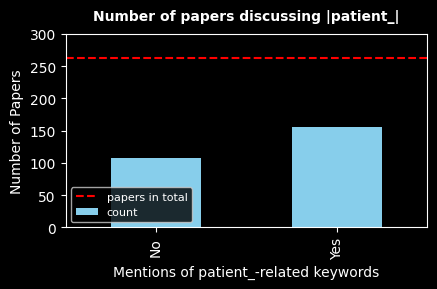

In [199]:
cats_to_plot(binary_keyword_counts_by_categories)

***

In [164]:
# By binary counts per category
#plot_category_percentage_binary(binary_keyword_counts_by_categories)

In [ ]:
# By total counts per category
plot_category_percentage_counts(refined_keyword_counts_by_categories)

***

In [273]:
import pandas as pd

def convert_float_column_to_int(df, column_name, fill_value=0):
    """
    Converts a float column to integers in a pandas DataFrame.
    
    Parameters:
    - df: pandas DataFrame.
    - column_name: The name of the column to convert.
    - fill_value: The value to replace NaNs with before conversion. Default is 0.
    
    Returns:
    - A pandas DataFrame with the column converted to integers.
    """
    # Fill NaN values with the specified fill_value
    df[column_name] = df[column_name].fillna(fill_value)
    
    # Convert the column to integers
    df[column_name] = df[column_name].astype(int)
    
    return df


In [469]:
from codecs import utf_16_be_decode
filename = '/Users/yasminsarkhosh/Documents/GitHub/machine-learning-bsc-thesis-2024/code/annotations/annotations/anno_demographics.csv'
anno_demo = pd.read_csv(filename, delimiter=';', header=0)
anno_demo = anno_demo.fillna(0)
anno_demo

NameError: name 'Users' is not defined

In [400]:
anno_demo = convert_float_column_to_int(anno_demo, 'sex/gender is used ', fill_value=0)
#anno_demo = convert_float_column_to_int(anno_demo, 'etnicity is used', fill_value=0 )
anno_demo

,title,volume,age is used,age sentence,sex/gender is used,sex/gender sentence,etnicity is used,etnicity sentence
0,3D Arterial Segmentation via Single 2D Project...,1,0,0,1,the cohort consists of 141 patients with pancr...,0,0
1,3D Mitochondria Instance Segmentation with Spa...,8,0,0,0,0,0,0
2,A Multi-task Network for Anatomy Identificatio...,9,0,0,0,0,0,0
3,A Novel Video-CTU Registration Method with Str...,9,0,0,0,0,0,0
4,A Sheaf Theoretic Perspective for Robust Prost...,4,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...
258,Weakly-Supervised Positional Contrastive Learn...,1,0,0,0,0,0,0
259,WeakPolyp: You only Look Bounding Box for Poly...,3,0,0,0,0,0,0
260,What Do AEs Learn? Challenging Common Assumpti...,5,0,0,0,0,0,0
261,X2Vision: 3D CT Reconstruction from Biplanar X...,10,0,0,0,0,0,0


In [401]:
anno_demo_age_counts = anno_demo['age is used '].value_counts()
anno_demo_sex_counts = anno_demo['sex/gender is used '].value_counts()
anno_demo_etnicity_counts = anno_demo['etnicity is used'].value_counts()

In [402]:
print('Total age counts:', anno_demo_age_counts)
print('Total sex counts:', anno_demo_sex_counts)
print('Total etnicity counts:', anno_demo_etnicity_counts)

Total age counts: age is used 
0    248
1     15
Name: count, dtype: int64
Total sex counts: sex/gender is used 
0    253
1     10
Name: count, dtype: int64
Total etnicity counts: etnicity is used
0    262
1      1
Name: count, dtype: int64


In [403]:
anno_demo.drop(columns=['volume', 'age sentence', 'sex/gender sentence', 'etnicity sentence'], inplace=True)
anno_demo

,title,age is used,sex/gender is used,etnicity is used
0,3D Arterial Segmentation via Single 2D Project...,0,1,0
1,3D Mitochondria Instance Segmentation with Spa...,0,0,0
2,A Multi-task Network for Anatomy Identificatio...,0,0,0
3,A Novel Video-CTU Registration Method with Str...,0,0,0
4,A Sheaf Theoretic Perspective for Robust Prost...,0,0,0
...,...,...,...,...
258,Weakly-Supervised Positional Contrastive Learn...,0,0,0
259,WeakPolyp: You only Look Bounding Box for Poly...,0,0,0
260,What Do AEs Learn? Challenging Common Assumpti...,0,0,0
261,X2Vision: 3D CT Reconstruction from Biplanar X...,0,0,0


In [404]:
# Mapping of keywords to main categories
keyword_to_category_demo_2 = {
    'age is used '   : 'demographics_',
    'sex/gender is used ': 'demographics_',
    'etnicity is used'   : 'demographics_',
}

categories_to_plot_demo_2 = ['demographics_']

In [450]:
def count_non_zero_values(df):
    """
    Count non-zero values in each column of a DataFrame.

    Parameters:
    - df: pandas DataFrame.

    Returns:
    - A pandas Series with counts of non-zero values for each column.
    """


    return (df == 0).sum()

zero_counts = count_non_zero_values(anno_demo)
print(zero_counts)


title                    0
age is used            248
sex/gender is used     253
etnicity is used       262
dtype: int64


In [405]:
def count_non_zero_values(df):
    """
    Count non-zero values in each column of a DataFrame.

    Parameters:
    - df: pandas DataFrame.

    Returns:
    - A pandas Series with counts of non-zero values for each column.
    """


    return (df != 0).sum()

non_zero_counts = count_non_zero_values(anno_demo)
print(non_zero_counts)


title                  263
age is used             15
sex/gender is used      10
etnicity is used         1
dtype: int64


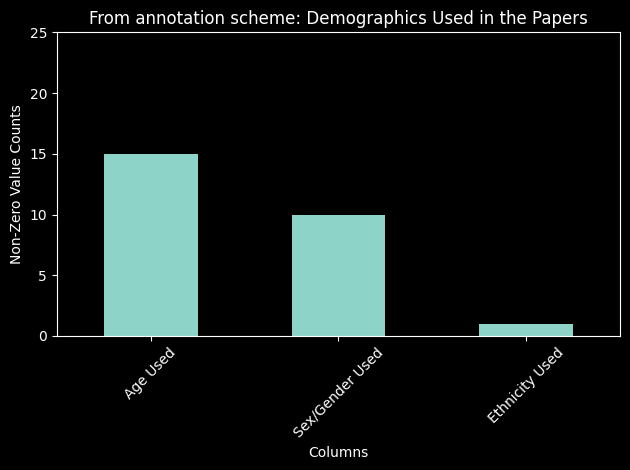

In [418]:
import pandas as pd
import matplotlib.pyplot as plt

new_labels = ['Age Used', 'Sex/Gender Used', 'Ethnicity Used']

# Plot the counts excluding the 'title'
ax = non_zero_counts.drop('title').plot(kind='bar')

# Set the title and labels
ax.set_title('From annotation scheme: Demographics Used in the Papers')
ax.set_xlabel('Columns')
ax.set_ylabel('Non-Zero Value Counts')
ax.set_ylim(0, 25)

# Set the new labels for the x-axis.
ax.set_xticklabels(new_labels, rotation=45)  # Rotate labels to fit longer names

# Adjust layout and display the plot
plt.tight_layout()  # Adjust layout so everything fits without overlapping
plt.show()



In [470]:
from codecs import utf_16_be_decode

filename = '/Users/yasminsarkhosh/Documents/GitHub/machine-learning-bsc-thesis-2024/code/annotations/annotations/anno_geoloc.csv'
anno_geoloc = pd.read_csv(filename, delimiter=';', header=0)
anno_geoloc = anno_geoloc.fillna(0)
anno_geoloc.drop(columns=['geolocation sentence', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 
                          'volume', 'name of hospital', 'name of country', 'name of area'], inplace=True)
anno_geoloc

,title,geolocation is used,gelocation as hospital,geolocation as continent,gelocation as country,geolocation as area
0,3D Arterial Segmentation via Single 2D Project...,0,0.0,0.0,0.0,0.0
1,3D Mitochondria Instance Segmentation with Spa...,0,0.0,0.0,0.0,0.0
2,A Multi-task Network for Anatomy Identificatio...,1,1.0,0.0,1.0,1.0
3,A Novel Video-CTU Registration Method with Str...,0,0.0,0.0,0.0,0.0
4,A Sheaf Theoretic Perspective for Robust Prost...,0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
258,Weakly-Supervised Positional Contrastive Learn...,0,0.0,0.0,0.0,0.0
259,WeakPolyp: You only Look Bounding Box for Poly...,0,0.0,0.0,0.0,0.0
260,What Do AEs Learn? Challenging Common Assumpti...,0,0.0,0.0,0.0,0.0
261,X2Vision: 3D CT Reconstruction from Biplanar X...,0,0.0,0.0,0.0,0.0


In [471]:
anno_geoloc['gelocation as hospital'] = anno_geoloc['gelocation as hospital'].astype(int)
anno_geoloc['geolocation as continent'] = anno_geoloc['geolocation as continent'].astype(int)
anno_geoloc['gelocation as country'] = anno_geoloc['gelocation as country'].astype(int)
anno_geoloc['geolocation as area'] = anno_geoloc['geolocation as area'].astype(int)

In [444]:
non_zero_counts_geoloc = count_non_zero_values(anno_geoloc)
print(non_zero_counts_geoloc)

title                       263
geolocation is used          41
gelocation as hospital       39
geolocation as continent      1
gelocation as country         7
geolocation as area           3
dtype: int64


In [445]:
non_zero_counts_geoloc

title                       263
geolocation is used          41
gelocation as hospital       39
geolocation as continent      1
gelocation as country         7
geolocation as area           3
dtype: int64

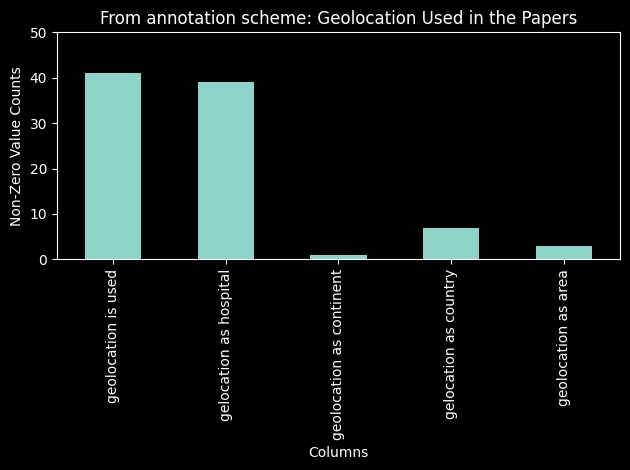

In [448]:
import pandas as pd
import matplotlib.pyplot as plt

#new_labels = ['Geolocation Used', 'Geolocation: Hospital', 'Geolocation: ']

# Plot the counts excluding the 'title'
ax = non_zero_counts_geoloc.drop('title').plot(kind='bar')

# Set the title and labels
ax.set_title('From annotation scheme: Geolocation Used in the Papers')
ax.set_xlabel('Columns')
ax.set_ylabel('Non-Zero Value Counts')
ax.set_ylim(0, 50)

# Set the new labels for the x-axis.
#ax.set_xticklabels(new_labels, rotation=45)  # Rotate labels to fit longer names

# Adjust layout and display the plot
plt.tight_layout()  # Adjust layout so everything fits without overlapping
plt.show()



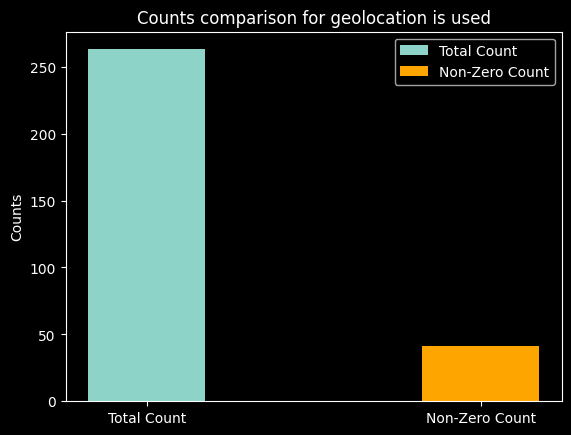

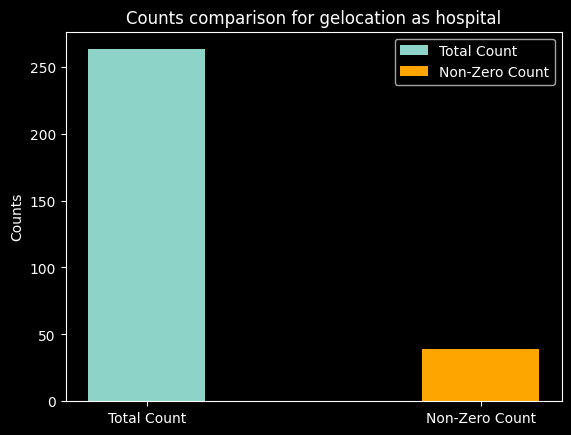

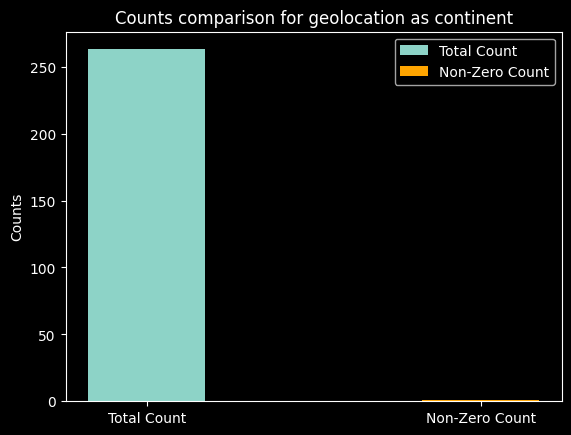

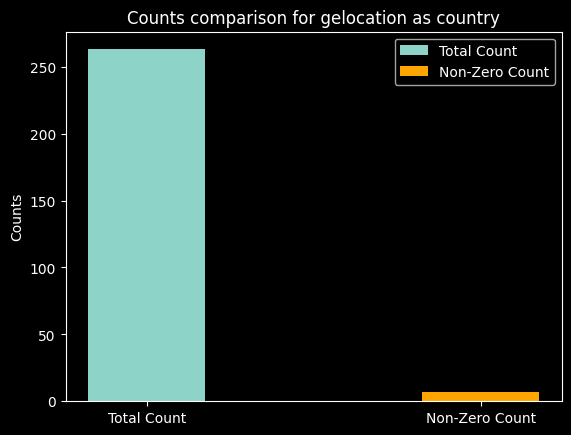

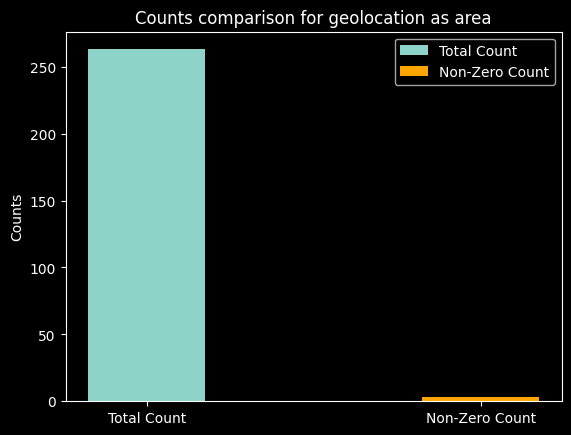

In [451]:
import pandas as pd
import matplotlib.pyplot as plt

# Calculate total number of entries for each column
total_entries = len(anno_geoloc)

# Iterate over each column (excluding 'title') and create a plot
for column in anno_geoloc.columns:
    if column == 'title':
        continue  # Skip the 'title' column
    
    # Data for plotting
    total_count = [total_entries]  # Total entries are the same for each column
    non_zero_count = [non_zero_counts_geoloc[column]]  # Non-zero counts from your earlier calculation
    
    # Plotting
    fig, ax = plt.subplots()
    width = 0.35  # Width of the bars
    
    # Create bars
    ax.bar('Total Count', total_count, width, label='Total Count')
    ax.bar('Non-Zero Count', non_zero_count, width, label='Non-Zero Count', color='orange')
    
    # Adding labels and title
    ax.set_ylabel('Counts')
    ax.set_title(f'Counts comparison for {column}')
    ax.legend()
    
    # Show the plot
    plt.show()


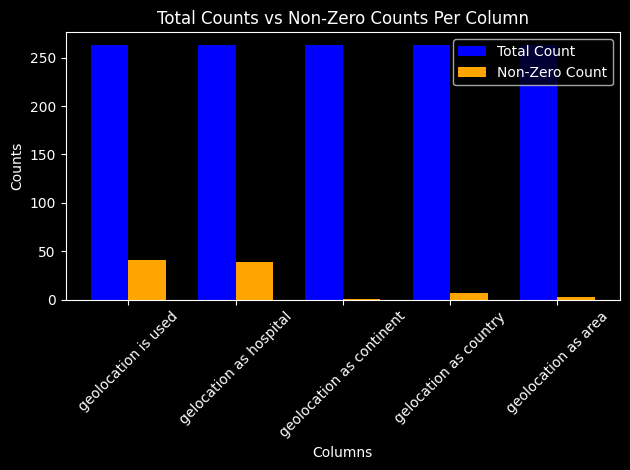

In [452]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data from your DataFrame
# Assuming 'counts' contains non-zero values for each column and excluding 'title'
counts_non_zero = non_zero_counts_geoloc.drop('title')

# Assuming all columns except 'title' are to be considered
total_counts = [len(anno_geoloc)] * len(counts_non_zero)

# Data for plotting
columns = counts_non_zero.index
total_counts = np.array(total_counts)
non_zero_counts = counts_non_zero.values

# Define the width of the bars and the positions
bar_width = 0.35
index = np.arange(len(columns))

# Initialize the plot
fig, ax = plt.subplots()

# Add total count bars
total_bars = ax.bar(index, total_counts, bar_width, label='Total Count', color='b')

# Add non-zero count bars
non_zero_bars = ax.bar(index + bar_width, non_zero_counts, bar_width, label='Non-Zero Count', color='orange')

# Adding labels, title and legend
ax.set_xlabel('Columns')
ax.set_ylabel('Counts')
ax.set_title('Total Counts vs Non-Zero Counts Per Column')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(columns)
ax.legend()

# Display the plot
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout so everything fits without overlapping
plt.show()


In [456]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


def plot_totals_counts_vs_non_zero_counts(df, counts):
    data_to_plot = pd.DataFrame({
        'Total Counts': len(df),  # Total number of rows
        'Non-Zero Counts': counts.drop('title'),  # Non-zero counts for each column
    }).T  # Transpose to switch rows and columns

    # We need to melt the DataFrame for seaborn
    data_to_plot = data_to_plot.reset_index().melt(id_vars='index', var_name='Columns', value_name='Counts')

    # Plot with seaborn
    plt.figure(figsize=(10, 6))
    sns.barplot(data=data_to_plot, x='Columns', y='Counts', hue='index')

    # Adding labels, title, and legend
    plt.xlabel('Columns')
    plt.ylabel('Counts')
    plt.title('Total Counts vs Non-Zero Counts Per Column')
    plt.legend(title='Count Type')

    # Show the final plot
    plt.tight_layout()
    plt.show()


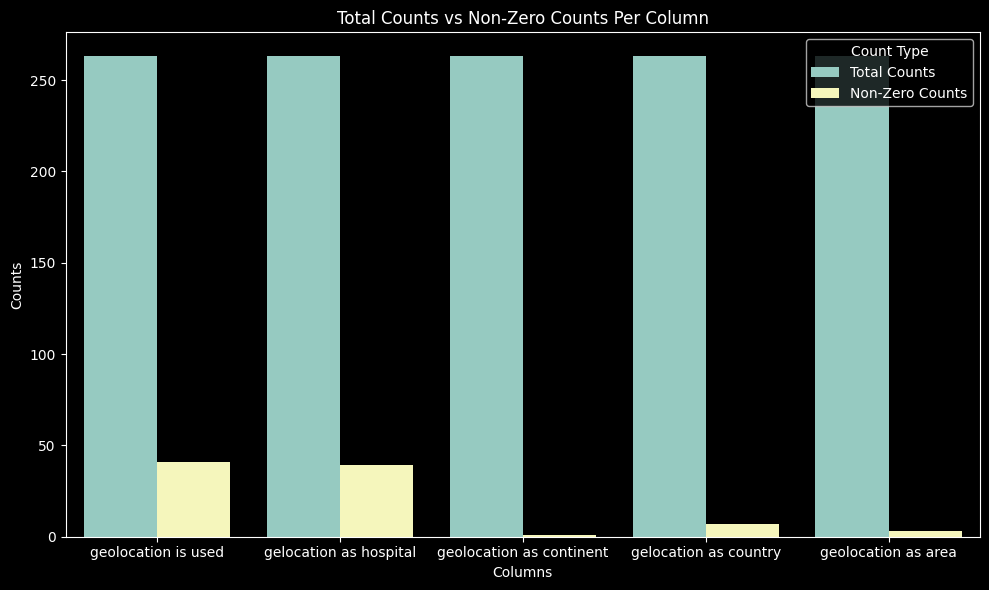

In [457]:
plot_totals_counts_vs_non_zero_counts(anno_geoloc, non_zero_counts_geoloc)

In [467]:
counts = pd.DataFrame(non_zero_counts_geoloc, columns=['counts'])